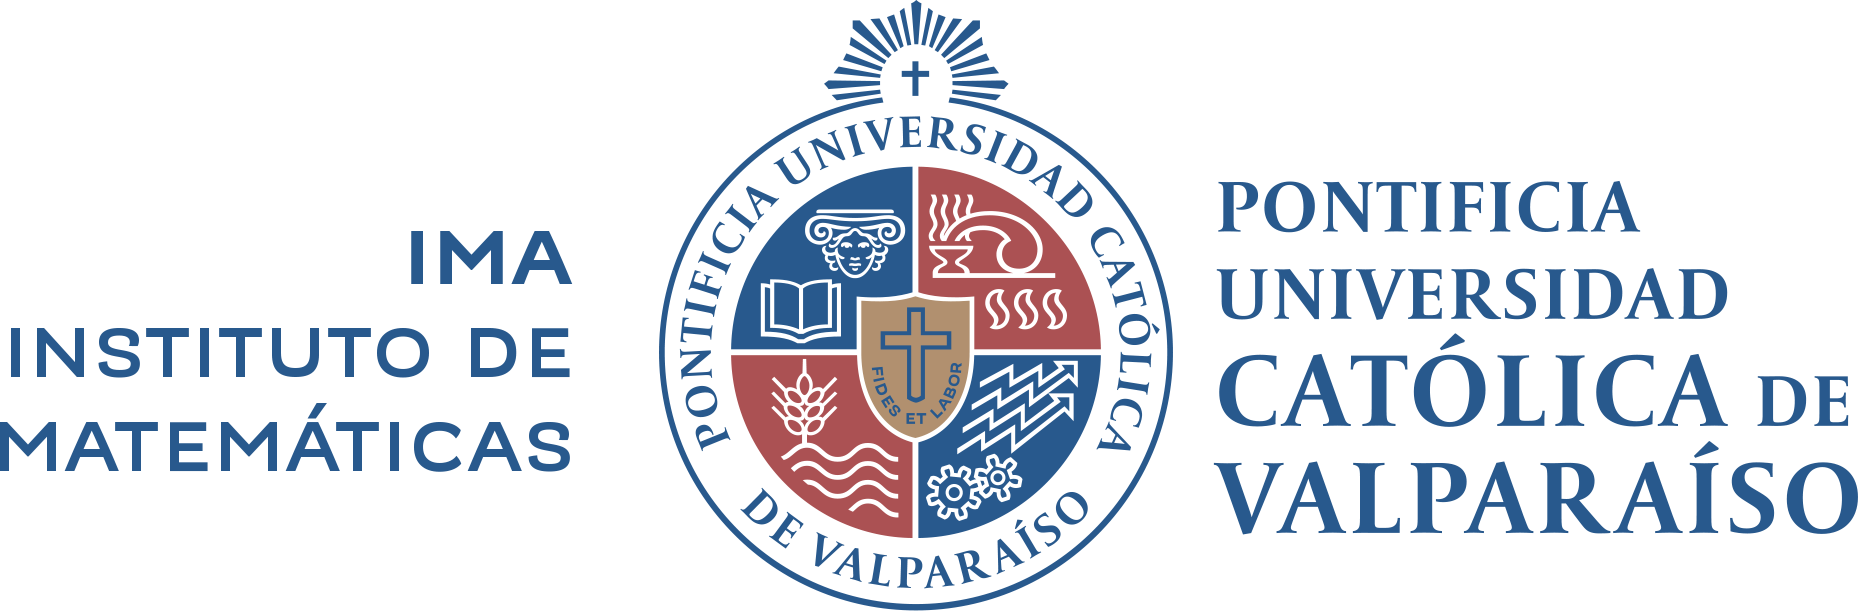

# PROGRAMACIÓN AVANZADA

## Instrucciones

1. Crear un archivo c++ para usar en python. El cual tenga una función, que escriba en pantalla: Hola, mi nombre es X. Reemplazar X por su nombre. Esa función debe llamarse "imprimir".
2. El nombre del archivo debe ser  nombre.cpp (con su nombre)
2. Crear el archivo CMakeLists.txt correspondiente
3. Importar en un archivo Tarea6Nombre.ipynb

## Desarrollo

### Instalación de pybind11

Se instala el paquete pybind11, que permite crear enlaces entre C++ y Python, facilitando la integración de módulos de C++ para ser usados en código Python.

In [1]:
!pip install pybind11

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 243.3/243.3 kB 3.8 MB/s eta 0:00:00


### Importación de módulos y configuración de pybind11

1.	import os: Importa el módulo de Python para realizar operaciones del sistema operativo (como cambiar de directorio, crear carpetas, etc.).  

2.	import sys: Importa el módulo para manipular variables y configuraciones del entorno de Python (por ejemplo, modificar rutas del intérprete).  

3.	import pybind11: Importa la biblioteca pybind11 para trabajar con bindings entre C++ y Python.  

4.	pybind11.get_cmake_dir(): Muestra la ruta del directorio donde se encuentran los archivos de configuración CMake necesarios para compilar el módulo.

In [2]:
import os
import sys
import pybind11
print(pybind11.get_cmake_dir())

/usr/local/lib/python3.10/dist-packages/pybind11/share/cmake/pybind11


### Crear y moverse al directorio build

1.	!mkdir build: Crea un directorio llamado build. Este será el lugar donde se compilará el código.

2.	os.chdir('/content/build'): Cambia el directorio actual del entorno a la carpeta build.


In [3]:
!mkdir build               # crear una carpeta llamada build
os.chdir('/content/build') # ir a la carpeta build

### Compilación con CMake y make

1.	!cmake ..: Ejecuta CMake desde el directorio build. El argumento .. indica que el archivo de configuración CMakeLists.txt (requerido por CMake) se encuentra en el directorio anterior (/content).  
	•	 CMake es una herramienta de generación de sistemas de construcción que configura el entorno necesario para compilar proyectos.  

2.	!make: Ejecuta el comando make para compilar el proyecto. Utiliza los archivos generados por CMake para construir el módulo.

In [4]:
!cmake ..                  # ejecutar el comando cmake
!make                      # ejecutar el comando make

-- The C compiler identification is GNU 11.4.0
-- The CXX compiler identification is GNU 11.4.0
-- Detecting C compiler ABI info
-- Detecting C compiler ABI info - done
-- Check for working C compiler: /usr/bin/cc - skipped
-- Detecting C compile features
-- Detecting C compile features - done
-- Detecting CXX compiler ABI info
-- Detecting CXX compiler ABI info - done
-- Check for working CXX compiler: /usr/bin/c++ - skipped
-- Detecting CXX compile features
-- Detecting CXX compile features - done
CMake Warning (dev) at /usr/local/lib/python3.10/dist-packages/pybind11/share/cmake/pybind11/FindPythonLibsNew.cmake:101 (message):
  Policy CMP0148 is not set: The FindPythonInterp and FindPythonLibs modules
  are removed.  Run "cmake --help-policy CMP0148" for policy details.  Use
  the cmake_policy command to set the policy and suppress this warning, or
  preferably upgrade to using FindPython, either by calling it explicitly
  before pybind11, or by setting PYBIND11_FINDPYTHON ON before

### Modificación de la ruta del intérprete de Python

Añade el directorio /content/build al sys.path. Esto permite que Python busque módulos en esa carpeta para poder importarlos.

In [5]:
sys.path.append('/content/build')

### Importación del módulo compilado y ejecución de funciones

1.	import stl_bindings: Importa el módulo stl_bindings, que fue compilado en los pasos anteriores. Este módulo contiene funciones escritas en C++ que fueron enlazadas con Python mediante pybind11.

2.	a = stl_bindings.imprimir(): Llama a la función imprimir() del módulo stl_bindings y guarda el resultado en la variable a.

3.	print(a): Imprime el valor de a.

In [6]:
import stl_bindings

a = stl_bindings.imprimir()
print(a)

Hola, mi nombre es Marcelo Bravari.


## Resumen

Este script muestra un flujo típico para crear e integrar un módulo de C++ con Python utilizando `pybind11`. El proceso incluye:

1.	Instalar y configurar `pybind11`.
2.	Configurar y compilar el módulo usando `CMake` y `make`.
3.	Agregar el directorio compilado al path de Python para poder importar el módulo.
4.	Usar una función del módulo para verificar que la integración fue exitosa.

Este tipo de integración es útil cuando se desea combinar la velocidad y eficiencia de **C++** con la flexibilidad de **Python**, por ejemplo, en proyectos que requieren procesamiento intensivo.